In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('slr_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\mspra\AppData\Local\Temp\ipykernel_15220\2841656581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SLV'], color = "blue")


<Axes: xlabel='SLV', ylabel='Density'>

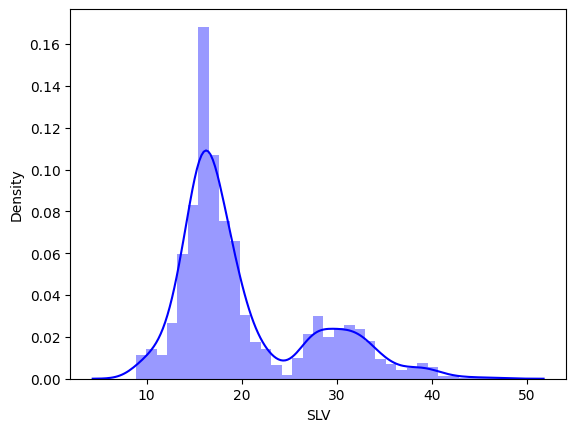

In [7]:
sns.distplot(df['SLV'], color = "blue")

In [8]:
X = df.drop(['SLV'], axis = 1)
Y = df['SLV']

In [9]:
X1 = df['GLD']

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [31]:
date = []
for i in X_test.index:
    date.append(list(df[df.index == i]['Date'])[0])

In [33]:
Date = pd.DataFrame([])
Date['Date'] = date
Date

,Date
0,2/6/2013
1,1/17/2008
2,2/10/2012
3,6/15/2016
4,9/21/2016
...,...
453,6/15/2017
454,8/12/2010
455,12/2/2009
456,9/15/2015


In [13]:
X_train = X_train.drop(['Date'], axis = 1)
X_test = X_test.drop(['Date'], axis =1)

# Plot Function

In [34]:
def plotter(Y_test, Y_pred, modName):
    plt.plot(Date['Date'],Y_test, label = "Data points", color = "green")
    plt.plot(Date['Date'], Y_pred,color='red') 
    plt.xlabel("Date")
    plt.ylabel("Silver Price")
    plt.title(modName)
    plt.show
    plt.savefig("{0}.png".format(modName))

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(X_train,Y_train)

LinearRegression()

In [38]:
reg.intercept_, reg.coef_

(-20.9884664057023,
 array([-2.04583204e-03,  2.77187442e-01,  5.26933293e-02,  6.83138372e+00]))

In [39]:
Y_pred = reg.predict(X_test)

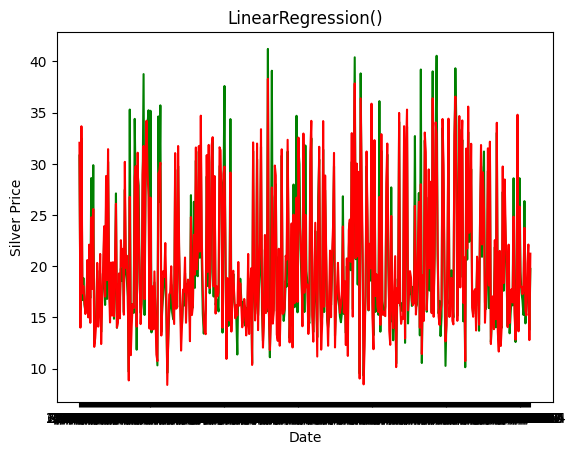

In [40]:
plotter(Y_test, Y_pred, reg)

In [41]:
r2 = abs(r2_score(Y_test,Y_pred))
print("R squared error : ", r2)

R squared error :  0.8976052712189319


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor 

In [43]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [44]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = regressor.predict(X_test)

In [46]:
Y_test = list(Y_test)

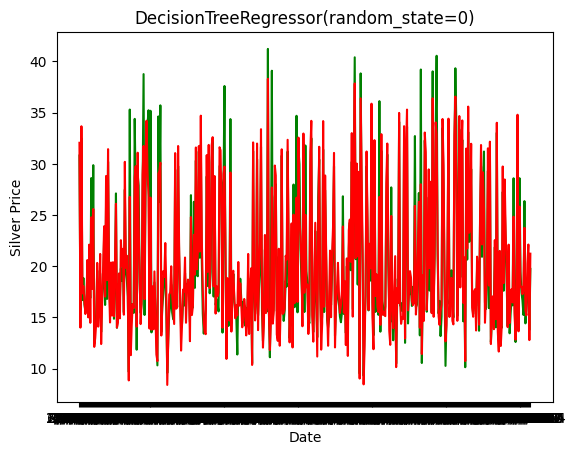

In [47]:
plotter(Y_test, Y_pred, regressor)

In [48]:
error_score = r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9851685738857959


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
regressor = RandomForestRegressor(n_estimators=100)

In [51]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
test_data_prediction = regressor.predict(X_test)

In [53]:
Y_test = list(Y_test)

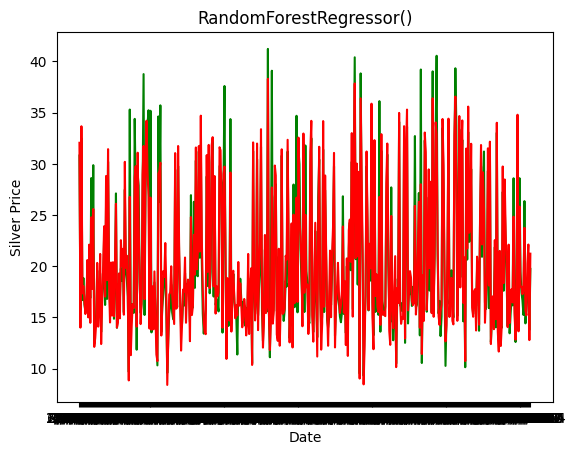

In [54]:
plotter(Y_test, Y_pred, regressor)

In [55]:
error_score = r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9937258380853707
